In [1]:
%load_ext autoreload
%autoreload 2

# Object-Oriented Programming (OOP) in Python

The Python Tutorial: [Classes](https://docs.python.org/3/tutorial/classes.html)

Today's Objectives:
- understand what an object & class are in Python
- write some simple classes
- write classes with "magic methods"
- write a class that inherits from another class

## [Everything in Python is an object](http://www.diveintopython.net/getting_to_know_python/everything_is_an_object.html)

What does that mean? Today we'll think of an ***object*** as a collection of functions and variables (which in this context we'll call ***methods*** and ***attributes*** of that object).

We'll also call the ***type*** of an object its ***class***, and a ***class definition*** is the code that acts as a blueprint for building objects of that type.

#### examples: lists & strings

In [2]:
lst = [5, 2, 3, 9]

In [3]:
lst.sort()

In [4]:
lst

[2, 3, 5, 9]

In [5]:
type(lst.sort())


NoneType

In [6]:
def dummy():
    return None

In [7]:
type(dummy())

NoneType

In [8]:
word = 'haberdashery'

In [9]:
word.capitalize()

'Haberdashery'

In [10]:
word

'haberdashery'

In [11]:
word.capitalize().split('a')

['H', 'berd', 'shery']

## Class definitions

In [12]:
class Dog:
    
    def __init__(self, name, mass, height, happy=True):
        """
        Args:
            name (str): dog's name
            mass (float): dog's mass in kg
            height (float): dog's height in m
        """
        self.name = name
        self.mass = mass
        self.height = height
        self.happy = happy
        
    def speak(self):
        return "bark bark my name is {}".format(self.name)
        
    def misbehave(self):
        self.happy = False
        return "i am being yelled at and i don't know why"

        
    def receive_treat(self, treat_mass):
        self.mass += treat_mass
        self.happy = True
        return "i am being rewarded and i don't know why"

In [13]:
dog1 = Dog('marvin', 4, .2)

In [14]:
dog1.speak()

'bark bark my name is marvin'

In [15]:
dog1.mass

4

In [16]:
dog1.receive_treat(6)

"i am being rewarded and i don't know why"

In [17]:
dog1.mass

10

In [18]:
dog2 = Dog('bess', 1, 1)

In [19]:
dog2.speak()

'bark bark my name is bess'

In [20]:
dog2.speak()

'bark bark my name is bess'

In [21]:
Dog.speak(dog2)

'bark bark my name is bess'

In [22]:
class DogPark:

    def __init__(self, dogs):
        """ 
        Args:
            dogs (list): list of Dog objects
        """
        self.dogs = dogs
    
    def add_dog(self, dog):
        self.dogs.append(dog)
    
    def treat_all_dogs(self, treat_mass):
        for dog in self.dogs:
            dog.receive_treat(treat_mass)

In [23]:
moses_dog_park = DogPark([dog1, dog2])

In [24]:
moses_dog_park.treat_all_dogs(200)

In [25]:
dog1

In [26]:
moses_dog_park

In [27]:
dir(moses_dog_park)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'add_dog',
 'dogs',
 'treat_all_dogs']

In [28]:
type(moses_dog_park.treat_all_dogs)

method

In [29]:
moses_dog_park.dogs[0]

In [30]:
dir(moses_dog_park.dogs[0])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'happy',
 'height',
 'mass',
 'misbehave',
 'name',
 'receive_treat',
 'speak']

In [31]:
moses_dog_park.dogs[0].name

'marvin'

In [32]:
a_dog = moses_dog_park.dogs[0]

In [33]:
a_dog

In [34]:
dog1

In [35]:
moses_dog_park.dogs.index(dog2)

1

In [36]:
list.index?

In [37]:
set.discard?

In [38]:
class DogParkSet:

    def __init__(self, dogs):
        """ 
        Args:
            dogs (set): set of Dog objects
        """
        self.dogs = dogs
    
    def add_dog(self, dog):
        self.dogs.add(dog)
        
    def remove_dog(self, dog_name):
        for dog in self.dogs:
            if dog.name == dog_name:
                self.dogs.discard(dog)
                return "{} has been returned".format(dog_name)
        return "{}'s not here, man".format(dog_name)
    
    def treat_all_dogs(self, treat_mass):
        for dog in self.dogs:
            dog.fetch(treat_mass)

In [39]:
dog1.name

'marvin'

In [40]:
dog2.name

'bess'

In [41]:
dog_park_set = DogParkSet(set([dog1,dog2]))

In [42]:
dog_park_set.remove_dog('bess')

'bess has been returned'

In [43]:
dog_park_set.dogs

{<__main__.Dog at 0x7f6b85498438>}

# Afternoon: More OOP

### Exercise: designing classes to solve a problem.

You have one bag of dice.  It holds many dice that have different numbers of sides.  It has: 1d4, 2d6, 4d8, 2d10, 1d12, 3d20.

You pull 3 dice out of the bag at random and set them aside.

Then you do the following 5 times: draw a die at random, roll it, record the number, and return the die to the bag.

What is the sum of those 5 rolls?

##### what classes would you design to simulate this experiment? what methods & attributes would you need?

tip: write down the verbs and nouns associated with this process.

(discuss with a neighbor for 5 minutes)

Now let's write the code in `die_problem.py`

In [44]:
from die_problem import Bag, Die

In [45]:
die1 = Die(8)

In [46]:
die1.roll()

6

In [47]:
die2 = Die(12)

In [48]:
die2.roll()

2

1d4, 2d6, 4d8, 2d10, 1d12, 3d20

In [49]:
some_dice = [Die(n) for n in [4, 6, 6, 8, 
                              8, 8, 8, 10, 
                              10, 12, 20, 
                              20, 20]]

In [50]:
some_dice

In [51]:
rolls = []
for d in some_dice:
    rolls.append(d.roll())

In [52]:
rolls

[3, 2, 1, 2, 4, 7, 4, 8, 2, 8, 14, 2, 2]

In [53]:
[d.roll() for d in some_dice]

[3, 5, 3, 3, 5, 8, 1, 7, 4, 7, 20, 10, 7]

In [54]:
bag1 = Bag(some_dice)

In [55]:
bag1.dice

In [56]:
bag1.remove_n_die(3)

In [59]:
bag1.dice

In [60]:
bag1.sum_n_times(5)

20

In [61]:
some_dice

In [62]:
sums = []
for i in range(10000):
    bag1 = Bag(some_dice)
    bag1.remove_n_die(3)
    sums.append(bag1.sum_n_times(5))

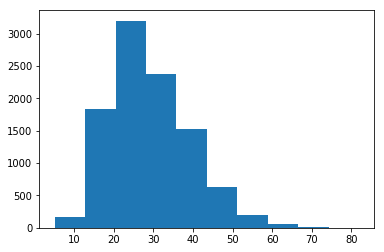

In [63]:
import matplotlib.pyplot as plt
plt.hist(sums)
plt.show()

## Magic Methods

[Python docs](https://docs.python.org/3/reference/datamodel.html)

Remember earlier when we saw that `dog.speak()` was shorthand for `Dog.speak(dog)`? Or, in general, `object_name.method_name()` is really `ClassName.method_name(object_name)`?

How does this translate to other ways of using objects? For example, what is python really doing when we type `len(some_list)` or `some_dictionary[some_key]` or `string1 + string2`?

Turns out that all of these commands are translated into class method calls with special names that all begin & end with two underscores. These are called **magic methods** (also "dunder methods").

In [64]:
some_list = [1,6,2,8]
len(some_list)

4

In [65]:
some_list.__len__()

4

In [66]:
list.__len__(some_list)

4

In [68]:
len(6)

TypeError: object of type 'int' has no len()

In [69]:
some_dictionary = {'moses':'ice cream', 
                   'elliott':'potato chips', 
                   'brandon':'kombucha', 
                   'mark': 'grape soda'}
some_dictionary['moses']

'ice cream'

In [70]:
some_dictionary.__getitem__('moses')

'ice cream'

In [71]:
dict.__getitem__(some_dictionary,'moses')

'ice cream'

In [72]:
string1 = 'peanutbutter'
string2 = 'chocolate'
string1 + string2

'peanutbutterchocolate'

In [73]:
string1.__add__(string2)

'peanutbutterchocolate'

In [74]:
str.__add__(string1, string2)

'peanutbutterchocolate'

Here's a handy reference for python's magic methods: http://www.diveintopython3.net/special-method-names.html

#### exercise: Fractions

In [158]:
from my_fraction import Fraction

In [159]:
f1 = Fraction(1,3)

In [160]:
f1.numerator

1

In [161]:
f1.denominator

3

In [162]:
f1

1 / 3

In [163]:
print(f1)

1 / 3


In [164]:
str(f1)

'1 / 3'

In [165]:
print(die1)

In [166]:
f2 = Fraction(3,7)

In [167]:
f1 + f2

16 / 21

In [168]:
f1

1 / 3

In [169]:
f2 = Fraction(1, 3)

In [170]:
f2

1 / 3

In [171]:
set([f1, f2])

TypeError: unhashable type: 'Fraction'

In [172]:
f1 == f2

True

In [173]:
id(f1)

140099165377256

In [174]:
id(f2)

140099164805608

In [127]:
f1

1 / 3

In [175]:
f1 + 6

19 / 3

In [177]:
f1.__add__(6)

19 / 3

In [178]:
Fraction.__add__(f1, 6)

19 / 3

In [181]:
int(6).denominator

1

In [182]:
int(6).numerator

6

In [176]:
6 + f1

TypeError: unsupported operand type(s) for +: 'int' and 'Fraction'

In [186]:
int(6).__add__(f1)

NotImplemented

In [130]:
f1

1 / 3

In [131]:
f2

1 / 3

In [132]:
f1 == f2

True

In [133]:
f3 = Fraction(6,18)

In [134]:
f3

6 / 18

In [135]:
f1 == f3

False

In [136]:
f1 == f2

True

In [139]:
f1

1 / 3

In [140]:
f2

1 / 3

In [138]:
set([f1, f2])

TypeError: unhashable type: 'Fraction'

## Inheritance

Say you really like a certain class (like, oh, Dog), but you want to make a class for a specific type of dog. Something that has all the usual dog attributes, but maybe is constrained / expanded in one particular way.

Do you have to write your own class from scratch? Nay! You can write a new class that **inherits** all the methods and attributes of another class, and you can choose which methods to override with your own.

In [187]:
class BarklessBasenji(Dog):
    
    def speak(self):
        return '...'

In [188]:
quiet_dog = BarklessBasenji('lando', 6,2)

In [189]:
quiet_dog.height

2

In [190]:
quiet_dog.speak()

'...'

In [191]:
dog1.speak()

'bark bark my name is marvin'

In [192]:
dog2.speak()

'bark bark my name is bess'

Or maybe you like dictionaries, but you're sick of seeing "KeyError" when a key isn't in the dictionary, and you wish it instead returned some default value.

In [193]:
some_dictionary

{'brandon': 'kombucha',
 'elliott': 'potato chips',
 'mark': 'grape soda',
 'moses': 'ice cream'}

In [195]:
dict(brandon='kombucha', moses='ice cream')

{'brandon': 'kombucha', 'moses': 'ice cream'}

In [199]:
dict(some_dictionary, jenny='apples')

{'brandon': 'kombucha',
 'elliott': 'potato chips',
 'jenny': 'apples',
 'mark': 'grape soda',
 'moses': 'ice cream'}

In [194]:
some_dictionary['brad']

KeyError: 'brad'

In [200]:
class MyCoolDictionary(dict):
    
    def __init__(self, dictionary, defaultvalue=None):
        super().__init__(dictionary)
        self.default = defaultvalue
        
    def __getitem__(self, key):
        if key in self:
            return super().__getitem__(key)
        return self.default

In [201]:
dd = MyCoolDictionary(some_dictionary, defaultvalue='yogurt')

In [202]:
dd['moses']

'ice cream'

In [203]:
dd['mike']

'yogurt'

In [204]:
'moses' in dd

True

In [206]:
'mike' in dd

False

More about super: https://rhettinger.wordpress.com/2011/05/26/super-considered-super/

In [207]:
some_dictionary.get?

In [208]:
some_dictionary.get('moses')

'ice cream'

In [211]:
some_dictionary.get('mike', 'yogurt')

'yogurt'

In [213]:
def buh():
    pass

In [215]:
type(buh())

NoneType